## Modern Portfolio Theroy Application
In this notebook, we use mean-variance analysis (modern portfolio theory) to optimally diversify a portfolio.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import datetime as dt
from alpha_vantage.timeseries import TimeSeries
import os
ts = TimeSeries(key='4U2354DVX4WPKCM8', output_format='pandas')

To begin we use the Alpha Vantage API to import adjusted closing prices. The API retrieves ~20 years of daily prices, volume, etc.

In [2]:
sym = ['AAPL', 'MSFT', 'GOOGL', 'DB', 'GLD']
data = pd.DataFrame()
for s in sym:
    symbol, meta_data = ts.get_daily_adjusted(symbol=s, outputsize='full')
    data[s] = symbol['5. adjusted close']
data.head()

,AAPL,MSFT,GOOGL,DB,GLD
date,,,,,
2021-02-19,129.87,240.970000,2088.81,11.63,167.01
2021-02-18,129.71,243.790000,2105.81,11.17,166.32
2021-02-17,130.84,244.200000,2118.62,11.27,166.33
2021-02-16,133.19,243.142425,2110.70,11.35,168.24
2021-02-12,135.37,244.429474,2095.03,10.89,170.69


In [3]:
data.tail()

,AAPL,MSFT,GOOGL,DB,GLD
date,,,,,
1999-11-05,0.679082,29.140643,NaN,50.596166,NaN
1999-11-04,0.643017,29.201114,NaN,50.505128,NaN
1999-11-03,0.626715,29.280682,NaN,50.596166,NaN
1999-11-02,0.617103,29.458912,NaN,50.421093,NaN
1999-11-01,0.596879,29.398441,NaN,50.161984,NaN


Looking at the data, Google and GLD don't have pricing data for the early 2000s. To account for this we look at a subset of the data starting in 2010.

<AxesSubplot:xlabel='date'>

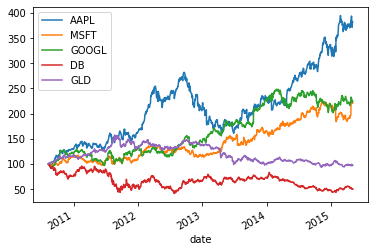

In [4]:
sub_data = data.iloc[1460:2650]
(sub_data / sub_data.iloc[len(sub_data)-1] * 100).plot()

In [5]:
returns = np.log(sub_data / data.shift(-1)) # log daily returns
means = returns.mean()*252                  # anualized mean
cov_matrix = returns.cov()*252              # anualized covariate matrix

In [6]:
weights = np.random.random(5) 
weights /= np.sum(weights)

In [7]:
expected_return = np.sum(returns.mean() * weights) * 252
expected_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
print(expected_volatility)

0.16349685604293854


In [8]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(5)
    weights /= np.sum(weights) 
    prets.append(np.sum(returns.mean() * weights) * 252) 
    pvols.append(np.sqrt(np.dot(weights.T,
    np.dot(returns.cov() * 252, weights))))
prets = np.array(prets) 
pvols = np.array(pvols)

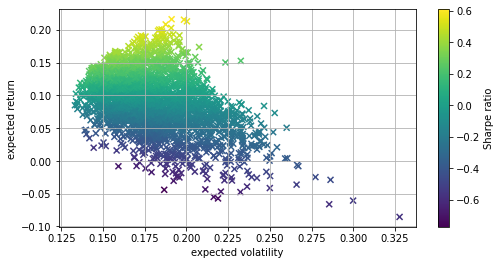

In [9]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c= (prets-0.10) / pvols, marker='x') 
plt.grid(True)
plt.xlabel('expected volatility') 
plt.ylabel('expected return') 
plt.colorbar(label='Sharpe ratio')

In [12]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(5))
optimal = optimize.minimize(min_variance, 5*[1./5,], method='SLSQP',
                            bounds=bnds, constraints=cons)

NameError: name 'min_variance' is not defined

In [13]:
optimal['x'].round(3)

NameError: name 'optimal' is not defined

In [14]:
compute(optimal['x'].round(3))

NameError: name 'compute' is not defined

In [15]:
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: compute(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_port, 5 * [1. / 5,], method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun']) 
tvols = np.array(tvols)

NameError: name 'sco' is not defined

ValueError: operands could not be broadcast together with shapes (50,) (0,) 

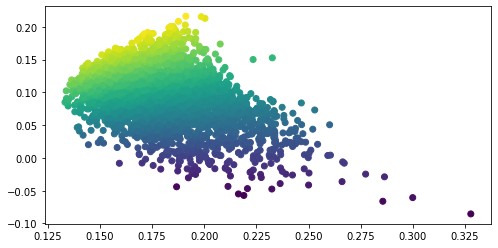

In [16]:
plt.figure(figsize=(8, 4)) 
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets, c=trets / tvols, marker='x')
            # efficient frontier
plt.plot(compute(optimal['x'])[1], compute(optimal['x'])[0], 'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(compute(optimal['x'])[1], compute(optimal['x'])[0], 'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility') 
plt.ylabel('expected return') 
plt.colorbar(label='Sharpe ratio')